#                                Replication Of McDonalds_Case_Study In Python







In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install requests



# **Import  All Libraries**

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# **Collecting Data**

In [3]:
df = pd.read_csv("mcdonalds.csv")
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


# **Exploring Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df_taste = df.iloc[:,:-4]
df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('yummy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('spicy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('greasy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('cheap').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['spicy'].value_counts()
    for x_label, grp in _df_4.groupby('yummy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('yummy')
_ = plt.ylabel('spicy')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['greasy'].value_counts()
    for x_label, grp in _df_5.groupby('spicy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('spicy')
_ = plt.ylabel('greasy')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cheap'].value_counts()
    for x_label, grp in _df_6.groupby('greasy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('greasy')
_ = plt.ylabel('cheap')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tasty'].value_counts()
    for x_label, grp in _df_7.groupby('cheap')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cheap')
_ = plt.ylabel('tasty')

In [6]:
for feature in df_taste.columns:
    df_taste[feature] = np.where(df_taste[feature] == 'Yes',1,0)
    df[feature] = np.where(df[feature] == 'Yes',1,0)

df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


from matplotlib import pyplot as plt
_df_8['yummy'].plot(kind='hist', bins=20, title='yummy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['spicy'].plot(kind='hist', bins=20, title='spicy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['greasy'].plot(kind='hist', bins=20, title='greasy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['cheap'].plot(kind='hist', bins=20, title='cheap')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='yummy', y='spicy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='spicy', y='greasy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='greasy', y='cheap', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='cheap', y='tasty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['convenient']
  ys = series['yummy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('convenient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('convenient')
_ = plt.ylabel('yummy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['convenient']
  ys = series['spicy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('convenient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('convenient')
_ = plt.ylabel('spicy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['convenient']
  ys = series['cheap']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('convenient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('convenient')
_ = plt.ylabel('cheap')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['convenient']
  ys = series['tasty']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('convenient', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('convenient')
_ = plt.ylabel('tasty')

from matplotlib import pyplot as plt
_df_20['yummy'].plot(kind='line', figsize=(8, 4), title='yummy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['spicy'].plot(kind='line', figsize=(8, 4), title='spicy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['greasy'].plot(kind='line', figsize=(8, 4), title='greasy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['cheap'].plot(kind='line', figsize=(8, 4), title='cheap')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df_taste.mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

# Principal Componants Analysis

In [8]:
pca = PCA(n_components=11).fit(np.array(df_taste))
transformed_df = pca.transform(df_taste)
df_PCA = pd.DataFrame(transformed_df, columns=df_taste.columns)
df_PCA

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [9]:
sd_arr = df_PCA.describe().loc['std']
temp_frame = pd.DataFrame({'std':sd_arr})
sd = temp_frame['std']
temp_frame['variance'] = [(std_dev**2)/sum(np.square(sd)) for std_dev in sd]
temp_frame['Cumulative_Proportion'] = np.cumsum(temp_frame['variance'])
temp_frame.head()

,std,variance,Cumulative_Proportion
yummy,0.757050,0.299447,0.299447
convenient,0.607456,0.192797,0.492244
spicy,0.504619,0.133045,0.625290
fattening,0.398799,0.083096,0.708386
greasy,0.337405,0.059481,0.767866


from matplotlib import pyplot as plt
_df_24['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['variance'].plot(kind='hist', bins=20, title='variance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Cumulative_Proportion'].plot(kind='hist', bins=20, title='Cumulative_Proportion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='std', y='variance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='variance', y='Cumulative_Proportion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumulative_Proportion']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Cumulative_Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative_Proportion')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cumulative_Proportion']
  ys = series['variance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Cumulative_Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative_Proportion')
_ = plt.ylabel('variance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Cumulative_Proportion']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Cumulative_Proportion'}, axis=1)
              .sort_values('Cumulative_Proportion', ascending=True))
  xs = counted['Cumulative_Proportion']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('Cumulative_Proportion', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cumulative_Proportion')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_32['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['variance'].plot(kind='line', figsize=(8, 4), title='variance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Cumulative_Proportion'].plot(kind='line', figsize=(8, 4), title='Cumulative_Proportion')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
pca_df = pd.DataFrame(pca.components_.round(3),columns=df_taste.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-0.477,-0.155,-0.006,0.116,0.304,-0.108,-0.337,-0.472,0.329,-0.214,0.375
1,0.364,0.016,0.019,-0.034,-0.064,-0.087,-0.611,0.307,0.601,0.077,-0.140
2,-0.304,-0.063,-0.037,-0.322,-0.802,-0.065,-0.149,-0.287,0.024,0.192,-0.089
3,0.055,-0.142,0.198,-0.354,0.254,-0.097,0.119,-0.003,0.068,0.763,0.370
4,-0.308,0.278,0.071,-0.073,0.361,0.108,-0.129,-0.211,-0.003,0.288,-0.729


from matplotlib import pyplot as plt
_df_35['yummy'].plot(kind='hist', bins=20, title='yummy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36['convenient'].plot(kind='hist', bins=20, title='convenient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['spicy'].plot(kind='hist', bins=20, title='spicy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['fattening'].plot(kind='hist', bins=20, title='fattening')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='yummy', y='convenient', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='convenient', y='spicy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='spicy', y='fattening', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='fattening', y='greasy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43['yummy'].plot(kind='line', figsize=(8, 4), title='yummy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['convenient'].plot(kind='line', figsize=(8, 4), title='convenient')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['spicy'].plot(kind='line', figsize=(8, 4), title='spicy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['fattening'].plot(kind='line', figsize=(8, 4), title='fattening')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
X = []
for feature in pca_df.columns:
    X.append(np.array(pca_df[feature]).reshape(1,-1))

col = list(pca_df.columns)
df_PC = pd.DataFrame()

for i in range(0,11):
    df_PC = df_PC.append(pd.DataFrame(X[i],columns=['PC{}'.format(i) for i in range(1,12)]),ignore_index=True)

df_PC[''] = pd.Series(col)
df_PC.set_index(keys='',inplace=True)
df_PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
,,,,,,,,,,,
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490


# **Plotting**

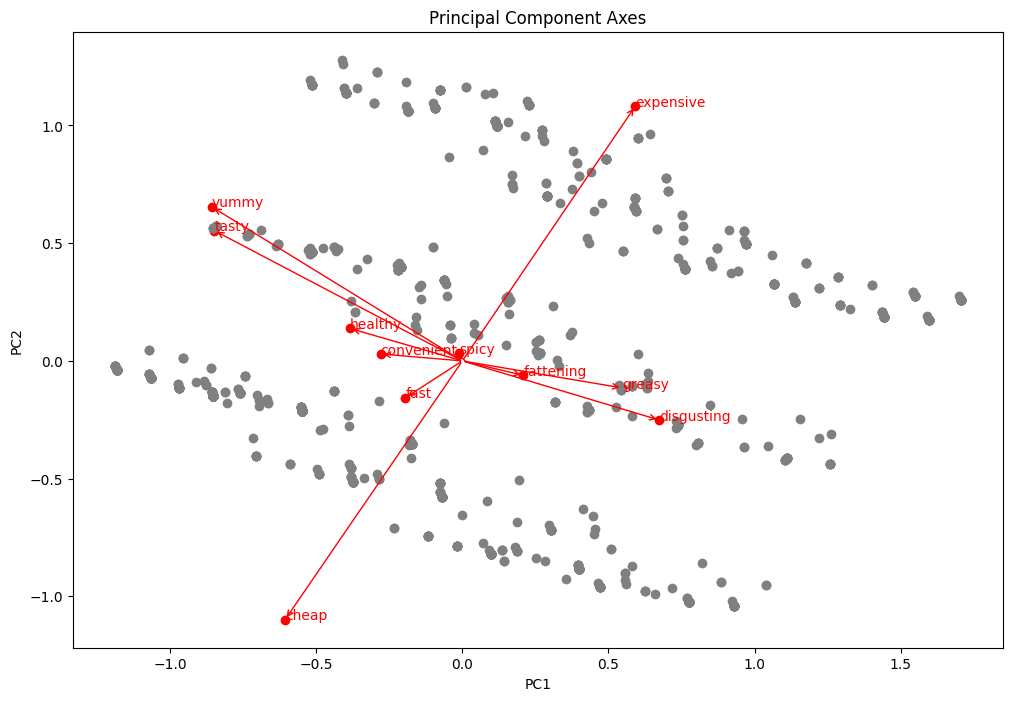

In [12]:
scale = 1.8
plt.figure(figsize=(12,8))
for i,j in enumerate(df_PC.index):
    plt.text(pca.components_[0, :][i]*scale, (pca.components_[1, :][i])*scale, j, color='red')
    plt.annotate('', xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale, color='red')
plt.scatter(data=df_PCA, x='yummy', y='convenient',color='grey');
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')

plt.show()

# **Extracting Segments**

# **Using K-Means Algorithm**

Text(0, 0.5, 'Sum of Within Cluster Distances')

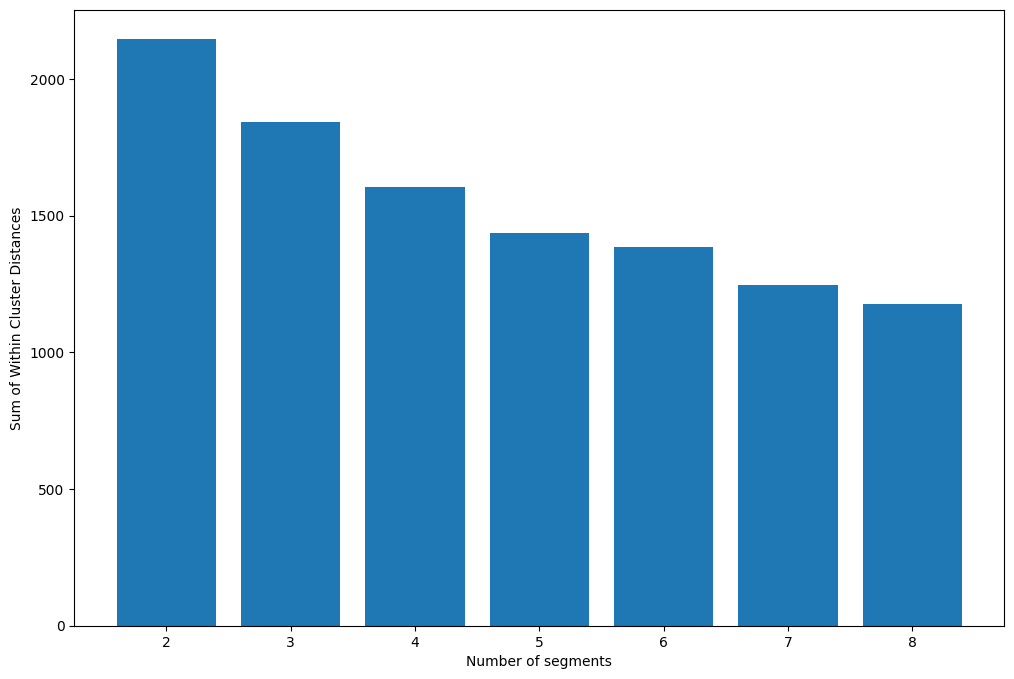

In [13]:
k_range = range(2, 9)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(df_taste)
    labels = model.predict(df_taste)
    inertias.append(model.inertia_)
    k_result.append(labels)

plt.figure(figsize=(12,8))
plt.bar(range(2, 9), inertias)
plt.xlabel('Number of segments')
plt.ylabel('Sum of Within Cluster Distances')

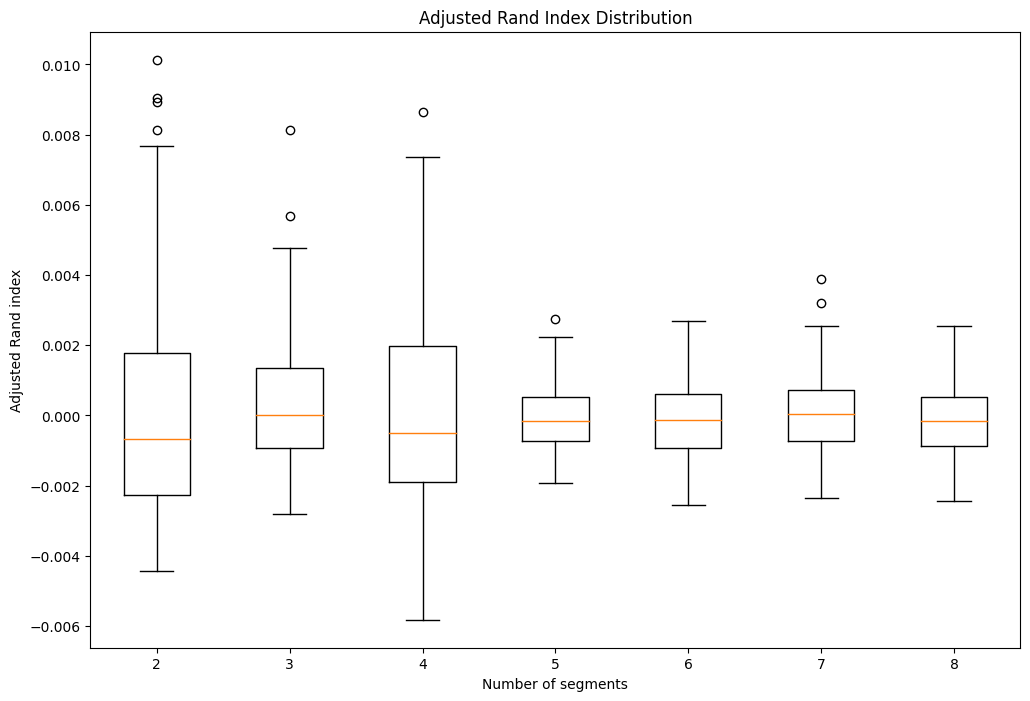

In [14]:
n_boot = 100*2
plt.figure(figsize = (12,8))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)

plt.boxplot(ari_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [15]:
#segment creation
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_taste)
label4 = model.predict(df_taste)

# **Using Mixture of Distribution**

In [18]:
# using mixture of distribution
score,aic,bic = [],[],[]

models = []
for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(df_taste)
    models.append(model)
    score.append(model.score(df_taste))
    aic.append(model.aic(df_taste))
    bic.append(model.bic(df_taste))

table = pd.DataFrame({
    'k': k_range,
    'LogLik': score,
    'AIC': aic,
    'BIC': bic
})

table

,k,LogLik,AIC,BIC
0,2,7.672279,-21985.641850,-21167.027072
1,3,10.727910,-30709.305224,-29478.742364
2,4,11.085822,-31593.398711,-29950.887770
3,5,15.801527,-45141.238007,-43086.778984
4,6,16.483932,-46968.305295,-44501.898190
5,7,16.914468,-48063.444888,-45185.089701
6,8,19.279293,-54779.625233,-51489.321965


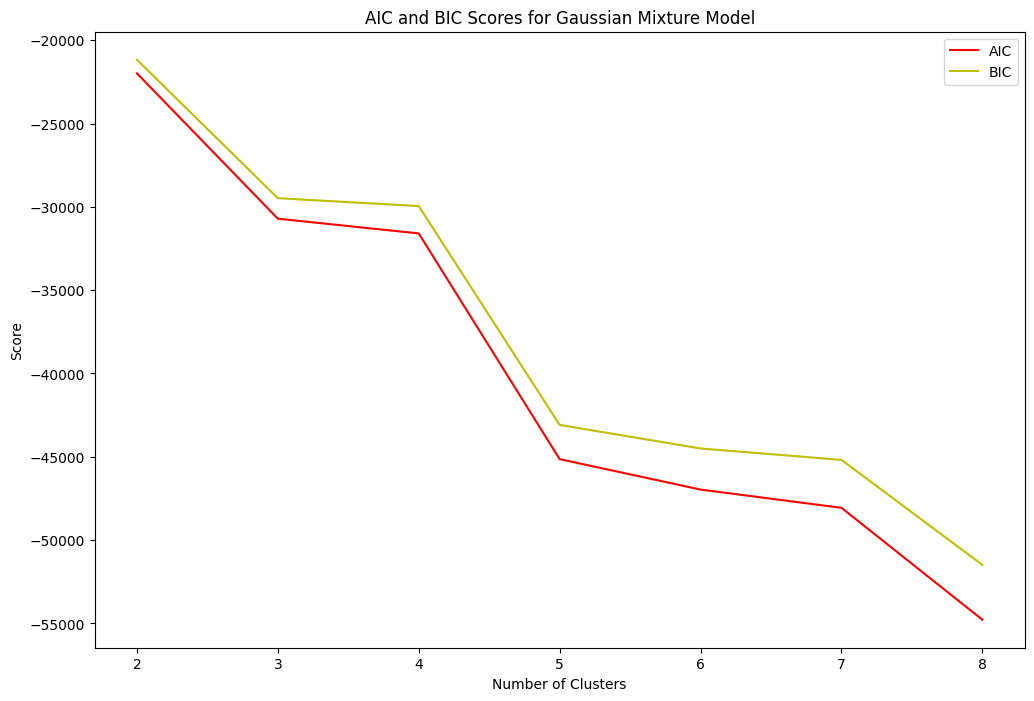

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, aic, label='AIC',color='r')
plt.plot(k_range, bic, label='BIC',color='y')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()

In [20]:
g_mixture = GaussianMixture(n_components=4, n_init=10, random_state=0)
g_mixture.fit(df_taste)

cluster_of_g_mixture = g_mixture.predict(df_taste)

KMC = KMeans(n_clusters=4,n_init=10,random_state=0)
KMC.fit(df_taste)
labels = KMC.predict(df_taste)

confusion_matrix = confusion_matrix(labels, cluster_of_g_mixture)

print("Confusion Matrix: \n",confusion_matrix)

Confusion Matrix: 
 [[ 31  32  28 232]
 [ 25   0 546   9]
 [ 46 229  29   0]
 [ 34 209   0   3]]


# **Profiling Segments**

In [21]:
df_copy = df_taste.copy()
df_copy['segments'] = label4
df_copy.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,segments
0,0,1,0,1,0,1,1,0,1,0,0,2
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2
5,1,1,0,1,0,1,1,1,0,0,0,1
6,1,1,1,1,0,1,0,1,1,1,0,0
7,1,1,0,1,1,1,1,1,0,0,0,1
8,0,0,0,1,1,0,0,0,1,0,1,3
9,1,1,0,1,1,1,0,1,1,0,0,0


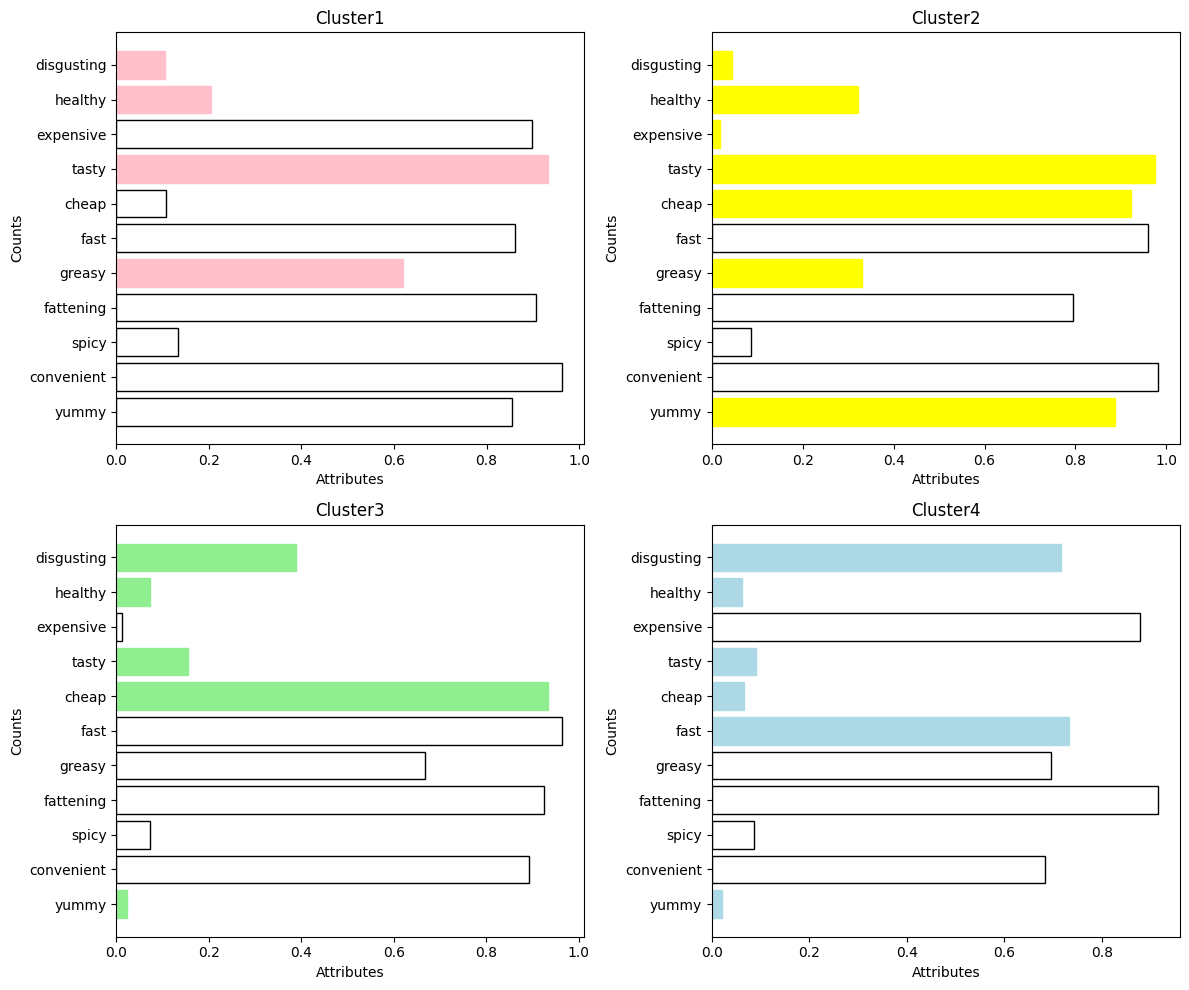

In [22]:
cluster_dict = {
    'Columns': df_taste.columns,
    'Cluster1': np.array(np.zeros(11)),
    'Cluster2': np.array(np.zeros(11)),
    'Cluster3': np.array(np.zeros(11)),
    'Cluster4': np.array(np.zeros(11))
}


segment_counts = df_copy["segments"].value_counts().sort_index()
for i, value in enumerate(segment_counts):
    temp = df_copy[df_copy['segments'] == i].drop(columns="segments")
    temp = temp.sum()/value
    cluster_dict["Cluster{}".format(i+1)] = temp.values

profile_plot_data= pd.DataFrame(cluster_dict)

cluster_list = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.figure(figsize=(12, 10))
for idx, cluster in enumerate(cluster_list,1):
    if idx==1:
        k_range = [7, 4, 9,10]
        color="pink"
    elif idx==2:
        k_range = [0,4,6,7,8,9,10]
        color="yellow"
    elif idx==3:
        k_range = [0,6,7,9,10]
        color="lightgreen"
    else:
        k_range = [0, 5,6,7,9,10]
        color="lightblue"
    plt.subplot(2, 2, idx)
    bars = plt.barh(profile_plot_data['Columns'], profile_plot_data[cluster],edgecolor='black',facecolor='none')
    for i in k_range:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(cluster)


plt.tight_layout()

plt.show()

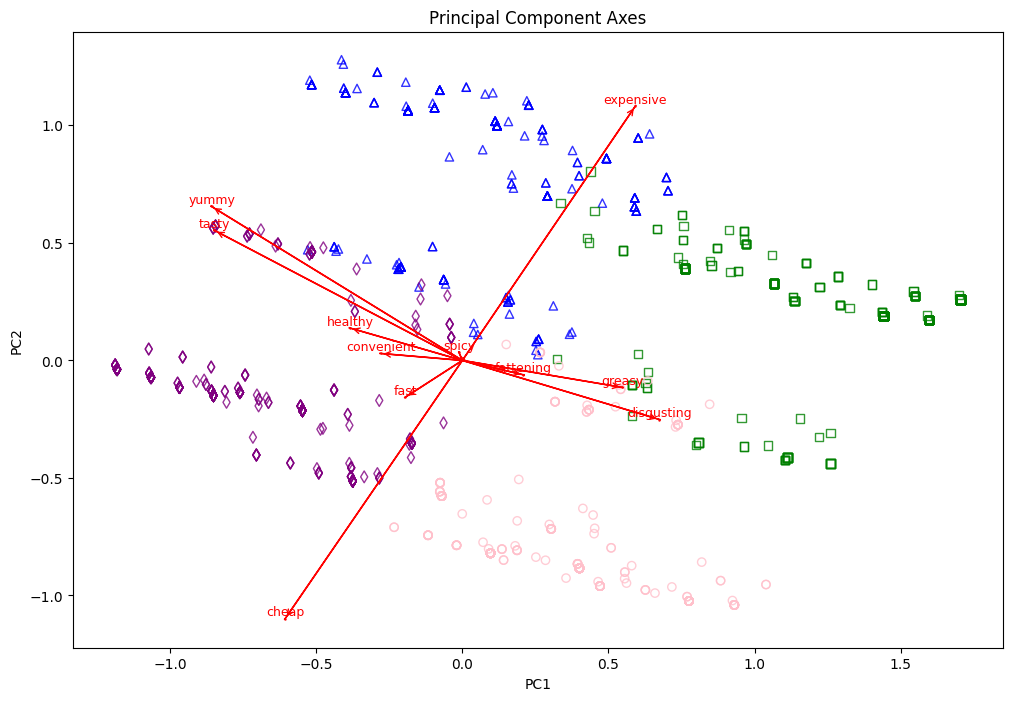

In [23]:
k4 = KMeans(n_clusters=4)
k4.fit(df_PCA)
l4 = k4.predict(df_PCA)

texts = []

markers = ['^', 's', 'o', 'd']

edge_colors = ['blue', 'green', 'pink', 'purple']

height = []
plt.figure(figsize=(12,8))
for i in range(4):
    temp = df_PCA[['yummy', 'convenient']][l4 == i]
    plt.scatter(temp['yummy'], temp['convenient'],label=i,edgecolor=edge_colors[i],marker=markers[i],alpha = 0.8,facecolor='none')

scale = 1.8

for i,j in enumerate(df_PCA.columns):
    text = plt.text(pca.components_[0, :][i]*scale,(pca.components_[1, :][i])*scale,j,color='red',fontsize=9,ha='center',va='bottom',stretch="expanded")
    texts.append(text)
    plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate('',xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale,s = 0.5,color='red')

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

# **Describing Segments**

In [24]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
5,1,1,0,1,0,1,1,1,0,0,0,+2,55,Every three months,Male
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,Every three months,Female
7,1,1,0,1,1,1,1,1,0,0,0,I love it!+5,23,Once a week,Female
8,0,0,0,1,1,0,0,0,1,0,1,I hate it!-5,58,Once a year,Male
9,1,1,0,1,1,1,0,1,1,0,0,+1,32,Every three months,Female


from matplotlib import pyplot as plt
_df_47['yummy'].plot(kind='hist', bins=20, title='yummy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['convenient'].plot(kind='hist', bins=20, title='convenient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['spicy'].plot(kind='hist', bins=20, title='spicy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['greasy'].plot(kind='hist', bins=20, title='greasy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_51.groupby('Like').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_52.groupby('VisitFrequency').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_53.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='yummy', y='convenient', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='convenient', y='spicy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56.plot(kind='scatter', x='spicy', y='greasy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='greasy', y='fast', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fattening']
  ys = series['yummy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('fattening', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Like')):
  _plot_series(series, series_name, i)
  fig.legend(title='Like', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fattening')
_ = plt.ylabel('yummy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fattening']
  ys = series['yummy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_59.sort_values('fattening', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VisitFrequency')):
  _plot_series(series, series_name, i)
  fig.legend(title='VisitFrequency', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fattening')
_ = plt.ylabel('yummy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fattening']
  ys = series['yummy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_60.sort_values('fattening', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fattening')
_ = plt.ylabel('yummy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fattening']
  ys = series['convenient']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_61.sort_values('fattening', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Like')):
  _plot_series(series, series_name, i)
  fig.legend(title='Like', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fattening')
_ = plt.ylabel('convenient')

from matplotlib import pyplot as plt
_df_62['yummy'].plot(kind='line', figsize=(8, 4), title='yummy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['convenient'].plot(kind='line', figsize=(8, 4), title='convenient')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_64['spicy'].plot(kind='line', figsize=(8, 4), title='spicy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_65['greasy'].plot(kind='line', figsize=(8, 4), title='greasy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VisitFrequency'].value_counts()
    for x_label, grp in _df_66.groupby('Like')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Like')
_ = plt.ylabel('VisitFrequency')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_67.groupby('VisitFrequency')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VisitFrequency')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_68['Like'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_68, x='yummy', y='Like', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_69['VisitFrequency'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_69, x='yummy', y='VisitFrequency', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_70['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_70, x='yummy', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_71['Like'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_71, x='convenient', y='Like', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Figure size 1200x800 with 0 Axes>

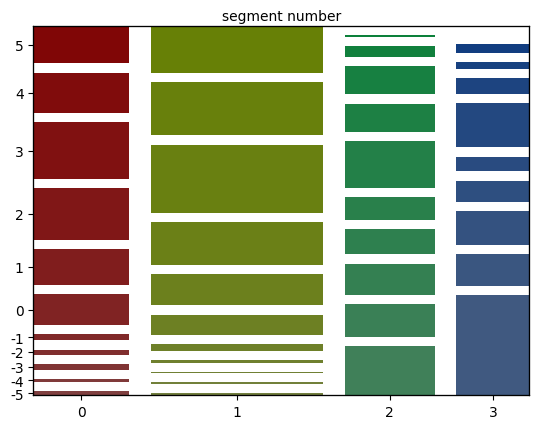

In [25]:
temp_col = df['Like'].replace({
    '+1':1,
    '+2':2,
    '+3':3,
    '+4':4,
    'I love it!+5':5,
    '0': 0,
    '-1': -1,
    '-2':-2,
    '-3':-3,
    '-4':-4,
    'I hate it!-5':-5
})

frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['like'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k: '')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

<Figure size 1200x800 with 0 Axes>

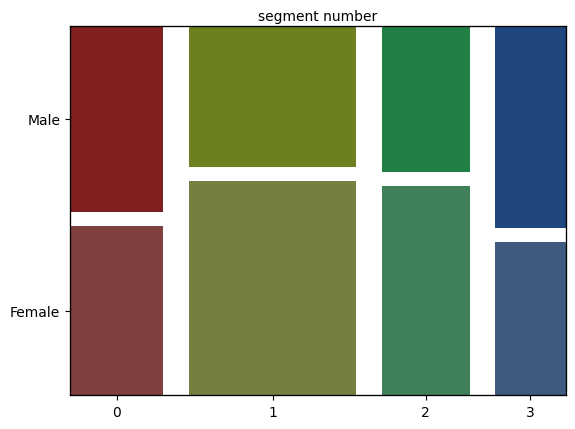

In [26]:
frame = pd.DataFrame({
    'segment': label4,
    'gender': df['Gender']
})

cross_tab = pd.crosstab(frame['segment'], frame['gender'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.06,labelizer = lambda k:'')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

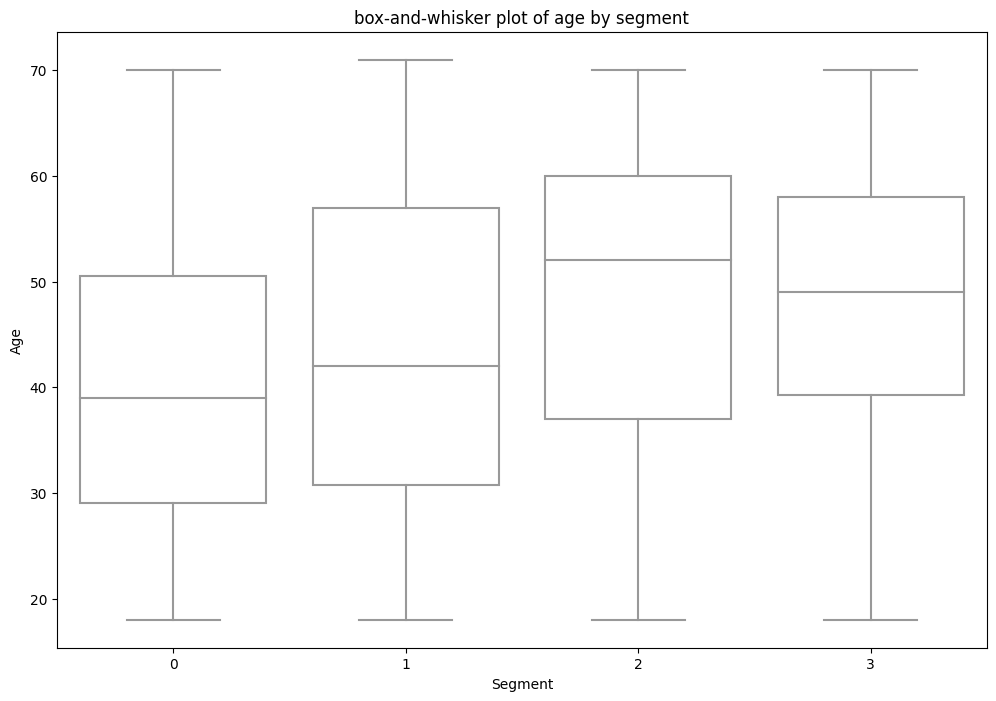

In [27]:
frame = pd.DataFrame({
    'segment': label4,
    'Age': df['Age']
})

plt.figure(figsize=(12, 8))
sns.boxplot(x='segment', y='Age', data=frame,color='white')

plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('box-and-whisker plot of age by segment')

plt.show()

# **Selecting The Target Segment**

In [28]:
frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col,
    'VisitFrequency': df['VisitFrequency'],
    'Gender': df['Gender']
})


visit_freq = {
    'Never': 1,
    'Once a year': 2,
    'Every three months': 3,
    'Once a month': 4,
    'More than once a week': 5,
    'Once a week': 6
}


frame['VisitFrequencyNumeric'] = frame['VisitFrequency'].map(visit_freq)
frame["GenderNumeric"] = np.where(df['Gender']=='Male',1,0)

visit = frame.groupby('segment')['VisitFrequencyNumeric'].mean()
like = frame.groupby('segment')['like'].mean()
female = frame.groupby('segment')["GenderNumeric"].mean()



In [29]:
visit

segment
0    3.987616
1    4.122414
2    2.677632
3    2.455285
Name: VisitFrequencyNumeric, dtype: float64

In [30]:
like

segment
0    2.139319
1    2.665517
2   -1.513158
3   -2.634146
Name: like, dtype: float64

In [31]:
female

segment
0    0.523220
1    0.398276
2    0.411184
3    0.569106
Name: GenderNumeric, dtype: float64

# **Plotting Segment**

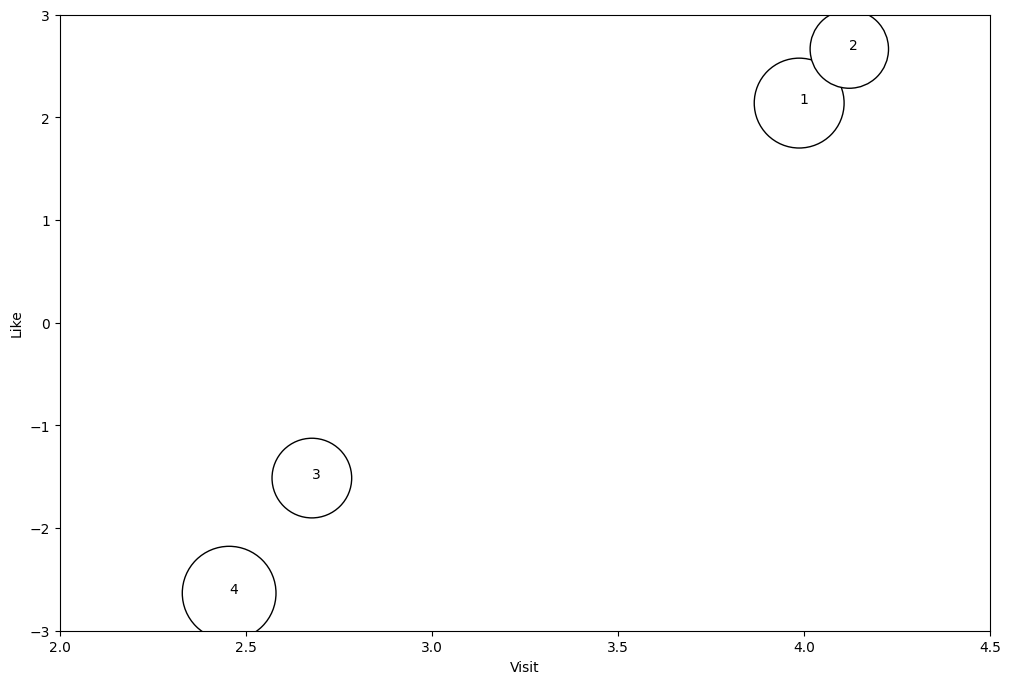

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(visit, like, s=female*8000,color='white',edgecolor="black")

for i, segment in enumerate(visit.index):
    plt.text(visit[segment], like[segment], str(i+1))

plt.xlim(2, 4.5)
plt.ylim(-3, 3)

plt.xlabel('Visit')
plt.ylabel('Like')

plt.show()